In [62]:
#merge data from several states
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import pprint
import seaborn as sns
from pprint import pprint

In [63]:
alldogs_merged = pd.read_csv('./data/alldogs_scoped_merged.csv')
state={'CA':'Los Angeles', 'MN': 'Minneapolis', 'NY':'New York', 'TX': 'Houston'}

In [64]:
len(alldogs_merged)

184542

In [65]:
alldogs_merged.head()

,id,organization_id,url,age,gender,size,coat,tags,name,status,...,attributes.declawed,attributes.special_needs,attributes.shots_current,environment.children,environment.dogs,environment.cats,contact.address.city,contact.address.state,contact.address.postcode,adoption_time
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,NaN,[],Sunny,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,19
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,Short,[],Batman,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,29
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,Short,[],Benji,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,18
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,Short,[],Zuma,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,57
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,Medium,[],Diego,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,8


In [66]:
mean_adpt_time = {}
#create a dict with each state and average adoption time
for current_state,current_city in state.items():
    key = current_state
    val = alldogs_merged[alldogs_merged['contact.address.state'] == current_state]['adoption_time'].mean()
    mean_adpt_time[key] = val
pprint(mean_adpt_time)

{'CA': 184.01237496363595,
 'MN': 102.96562054208273,
 'NY': 227.69666935576814,
 'TX': 140.0659042704393}


In [67]:
alldogs_merged = alldogs_merged[alldogs_merged['adoption_time']<=200]
len(alldogs_merged)

153466

In [6]:
#don't do this, it could be important
#alldogs_merged = alldogs_merged[alldogs_merged['attributes.special_needs']==False]
#len(alldogs_merged)

151513

In [68]:
alldogs_merged = alldogs_merged[alldogs_merged['gender']!='Unknown']
len(alldogs_merged)

153436

In [69]:
# Check for any missing data
print("Table size -", end=' ')
print(alldogs_merged.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (alldogs_merged.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
missing_cols = [col for col in alldogs_merged.columns
                     if alldogs_merged[col].isnull().any()]

Table size - (153436, 32)
Checking for missing values..
coat                     66953
name                        16
breeds.secondary         88860
colors.primary           50734
colors.secondary        100162
colors.tertiary         151755
attributes.declawed     153436
environment.children    126539
environment.dogs        120748
environment.cats        137443
dtype: int64


In [70]:
type(missing_cols)

list

In [71]:
alldogs_nm = alldogs_merged.drop(missing_cols, axis=1)

In [72]:
alldogs_nm.head()

,id,organization_id,url,age,gender,size,tags,status,status_changed_at,published_at,...,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.city,contact.address.state,contact.address.postcode,adoption_time
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,[],adopted,2015-12-11T20:50:51+0000,2015-11-22T20:02:14+0000,...,True,False,True,True,False,True,Los Angeles,CA,90013,19
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,[],adopted,2015-12-21T22:23:16+0000,2015-11-22T20:05:42+0000,...,False,False,True,True,False,True,Los Angeles,CA,90013,29
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,[],adopted,2015-12-30T01:22:04+0000,2015-12-11T20:55:05+0000,...,False,False,True,False,False,True,Los Angeles,CA,90013,18
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,[],adopted,2016-02-12T19:13:27+0000,2015-12-16T21:51:44+0000,...,False,False,True,False,False,True,Los Angeles,CA,90013,57
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,[],adopted,2015-12-30T01:21:59+0000,2015-12-21T22:22:57+0000,...,True,False,True,False,False,True,Los Angeles,CA,90013,8


In [73]:
len(alldogs_nm)

153436

In [74]:
#remove negative days error
alldogs_nm = alldogs_nm[alldogs_nm['adoption_time']>=0]

In [75]:
alldogs_nm.columns

Index(['id', 'organization_id', 'url', 'age', 'gender', 'size', 'tags',
       'status', 'status_changed_at', 'published_at', 'distance',
       'breeds.primary', 'breeds.mixed', 'breeds.unknown',
       'attributes.spayed_neutered', 'attributes.house_trained',
       'attributes.special_needs', 'attributes.shots_current',
       'contact.address.city', 'contact.address.state',
       'contact.address.postcode', 'adoption_time'],
      dtype='object')

In [76]:
X_features = ['age', 'gender', 'size',
              'breeds.mixed', 'attributes.spayed_neutered', 'attributes.house_trained',
              'attributes.special_needs', 'attributes.shots_current', 'contact.address.state']
X = alldogs_nm[X_features]
X.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state
0,Baby,Female,Small,True,True,True,False,True,CA
1,Young,Male,Small,False,True,True,False,True,CA
2,Young,Male,Medium,False,True,False,False,True,CA
3,Adult,Female,Medium,False,True,False,False,True,CA
4,Young,Male,Medium,True,True,False,False,True,CA


In [21]:
X['age'].value_counts()

Young     55488
Baby      51911
Adult     40256
Senior     3829
Name: age, dtype: int64

In [22]:
X['gender'].value_counts()

Male      76377
Female    75107
Name: gender, dtype: int64

In [23]:
X['size'].value_counts()

Medium         60828
Small          58982
Large          29530
Extra Large     2144
Name: size, dtype: int64

In [24]:
X['contact.address.state'].value_counts()

NY    40526
TX    38231
MN    36721
CA    36006
Name: contact.address.state, dtype: int64

In [78]:
test = alldogs_merged['name'].value_counts()
test[test>10]

Bella          499
Max            441
Lucy           438
Daisy          436
Buddy          416
Charlie        394
Jack           337
Molly          335
Lola           312
Bear           280
Bailey         276
Ginger         274
Rocky          262
Penny          258
Toby           252
Maggie         252
Luna           246
Sadie          243
Coco           242
Rosie          238
Lady           237
Sophie         233
Duke           230
Lucky          216
Lily           214
Teddy          210
Ruby           207
Stella         205
Cooper         203
Princess       202
              ... 
Cheerio         11
SKY             11
FOXY            11
ELLA            11
Val             11
Carrot          11
Jess            11
Davis           11
Cherub          11
Jeter           11
Pinkie          11
ROMEO           11
Kimmie          11
Little Bear     11
OREO            11
Jazmine         11
Cadence         11
Alana           11
Monet           11
Barnie          11
Suzie Q         11
Muneca      

In [79]:
test.to_csv('names.csv', header=False, index=True)

In [77]:
X.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state
0,Baby,Female,Small,True,True,True,False,True,CA
1,Young,Male,Small,False,True,True,False,True,CA
2,Young,Male,Medium,False,True,False,False,True,CA
3,Adult,Female,Medium,False,True,False,False,True,CA
4,Young,Male,Medium,True,True,False,False,True,CA


In [80]:
y = alldogs_nm['adoption_time']

In [81]:
len(X)

153436

In [82]:
cat_col = ['age','gender','size','contact.address.state']

In [83]:
X[cat_col]=X[cat_col].astype('category')

C:\anaconda_python\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [84]:
total = pd.concat([X,y], axis=1)
total.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,adoption_time
0,Baby,Female,Small,True,True,True,False,True,CA,19
1,Young,Male,Small,False,True,True,False,True,CA,29
2,Young,Male,Medium,False,True,False,False,True,CA,18
3,Adult,Female,Medium,False,True,False,False,True,CA,57
4,Young,Male,Medium,True,True,False,False,True,CA,8


In [33]:
len(total)

151484

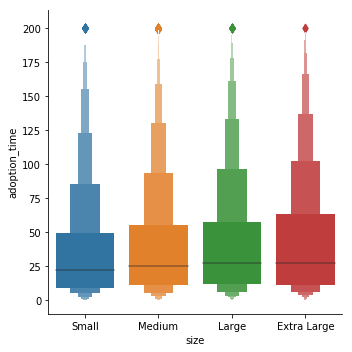

In [34]:
sizeplot = sns.catplot(x='size', y='adoption_time', order=["Small", "Medium", "Large", "Extra Large"] , data=total, kind='boxen');

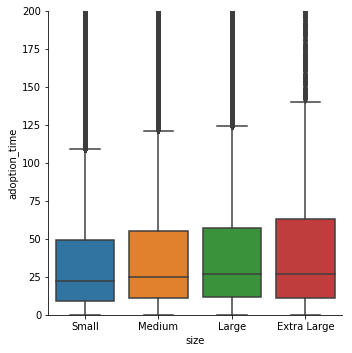

In [35]:
sizeplot2 = sns.catplot(x='size', y='adoption_time', order=["Small", "Medium", "Large", "Extra Large"] , data=total, kind='box');
sizeplot2.set(ylim=(0,200))

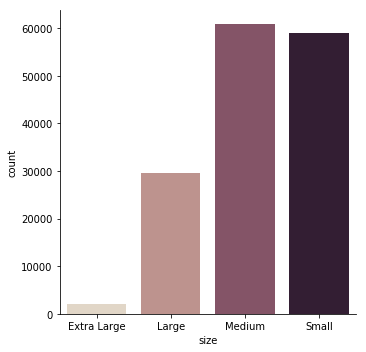

In [36]:
sns.catplot(x="size", kind="count", palette="ch:.25", data=total);

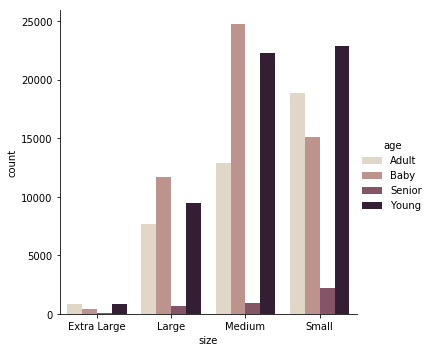

In [37]:
sns.catplot(x="size", kind="count", hue="age", palette="ch:.25", data=total);

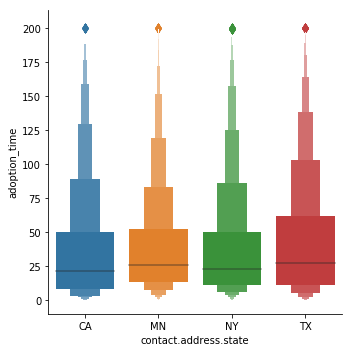

In [38]:
sns.catplot(x='contact.address.state', y='adoption_time', kind="boxen", data=total);

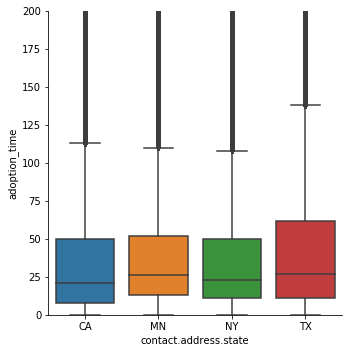

In [39]:
sizeplot3 = sns.catplot(x='contact.address.state', y='adoption_time', order=["CA", "MN", "NY", "TX"] , data=total, kind='box');
sizeplot3.set(ylim=(0,200))

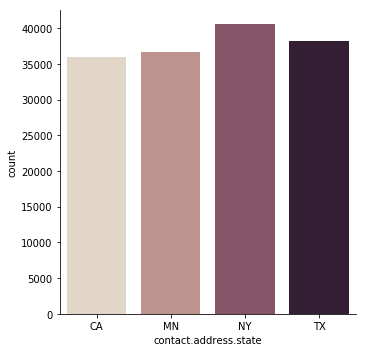

In [40]:
sns.catplot(x="contact.address.state", kind="count", palette="ch:.25", data=total);

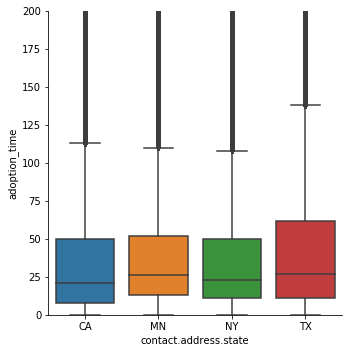

In [41]:
sizeplot3 = sns.catplot(x='contact.address.state', y='adoption_time', order=["CA", "MN", "NY", "TX"] , data=total, kind='box');
sizeplot3.set(ylim=(0,200))

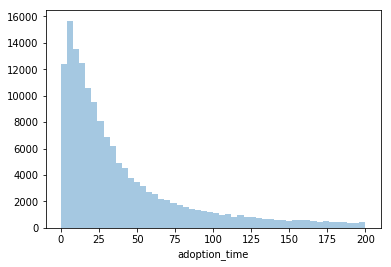

In [21]:
sns.distplot(total['adoption_time'], kde=False)

In [95]:
log_adpt_time = total.apply(lambda x: np.log((x['adoption_time'])+1.1), axis=1)

In [44]:
len(total)

151484

In [45]:
total.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.shots_current,contact.address.state,adoption_time
0,Baby,Female,Small,True,True,True,True,CA,19
1,Young,Male,Small,False,True,True,True,CA,29
2,Young,Male,Medium,False,True,False,True,CA,18
3,Adult,Female,Medium,False,True,False,True,CA,57
4,Young,Male,Medium,True,True,False,True,CA,8


[Text(0, 0.5, 'count'), Text(0.5, 0, 'log adoption time')]

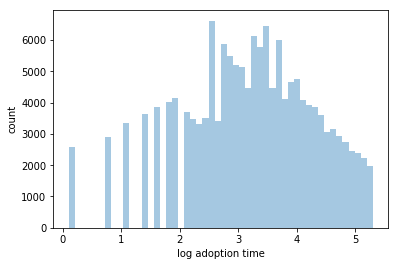

In [96]:
ax = sns.distplot(log_adpt_time, kde=False)
ax.set(xlabel='log adoption time', ylabel='count')

In [48]:
time_inv = total.apply(lambda x: 1/(x['adoption_time']+1), axis=1)

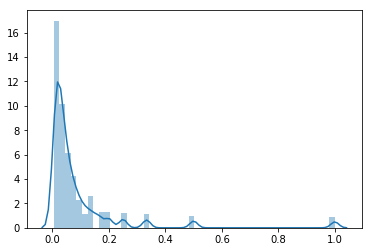

In [49]:
sns.distplot(time_inv)

In [50]:
total['log_adpt_time'] = total.apply(lambda x: np.log((x['adoption_time'])+1.1), axis=1)

In [51]:
total.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.shots_current,contact.address.state,adoption_time,log_adpt_time
0,Baby,Female,Small,True,True,True,True,CA,19,3.000720
1,Young,Male,Small,False,True,True,True,CA,29,3.404525
2,Young,Male,Medium,False,True,False,True,CA,18,2.949688
3,Adult,Female,Medium,False,True,False,True,CA,57,4.062166
4,Young,Male,Medium,True,True,False,True,CA,8,2.208274


In [52]:
total['log_adpt_time'].min()

0.09531017980432493

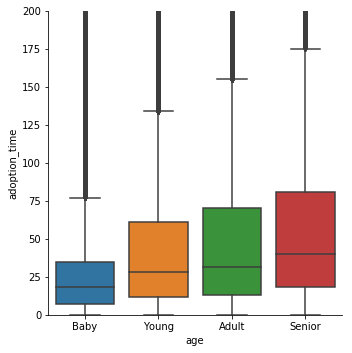

In [91]:
sizeplot3 = sns.catplot(x='age', y='adoption_time', order=["Baby", "Young", "Adult", "Senior"] , data=total, kind='box');
sizeplot3.set(ylim=(0,200))

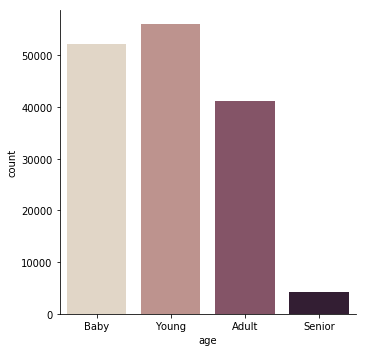

In [92]:
sns.catplot(x="age", kind="count", palette="ch:.25",order=["Baby", "Young", "Adult", "Senior"], data=total);

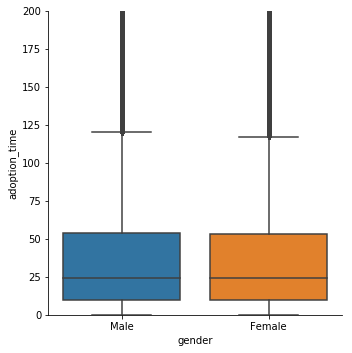

In [55]:
sizeplot3 = sns.catplot(x='gender', y='adoption_time', order=["Male", "Female"] , data=total, kind='box');
sizeplot3.set(ylim=(0,200))

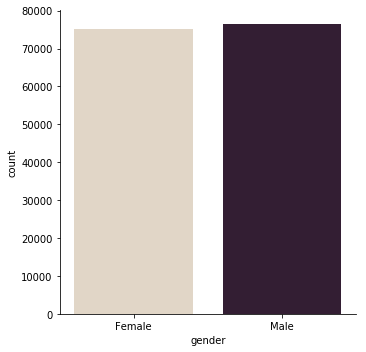

In [56]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=total);

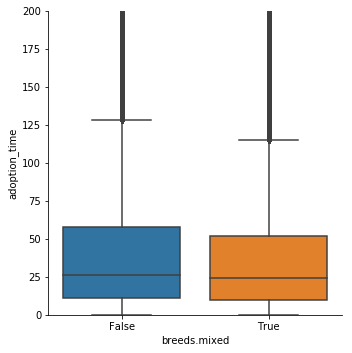

In [57]:
sizeplot3 = sns.catplot(x='breeds.mixed', y='adoption_time', data=total, kind='box');
sizeplot3.set(ylim=(0,200))

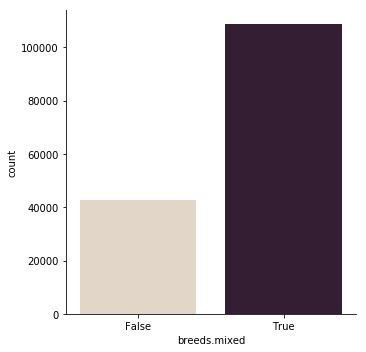

In [58]:
sns.catplot(x="breeds.mixed", kind="count", palette="ch:.25", data=total);

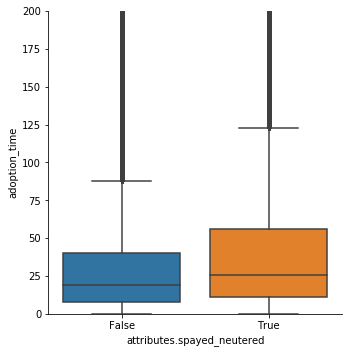

In [60]:
sizeplot3 = sns.catplot(x='attributes.spayed_neutered', y='adoption_time', data=total, kind='box');
sizeplot3.set(ylim=(0,200))

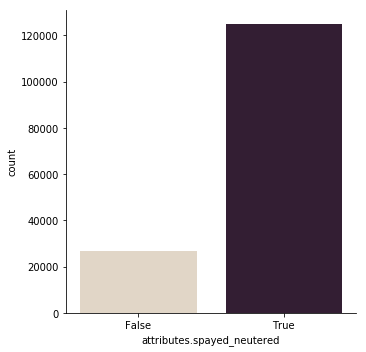

In [61]:
sns.catplot(x="attributes.spayed_neutered", kind="count", palette="ch:.25", data=total);

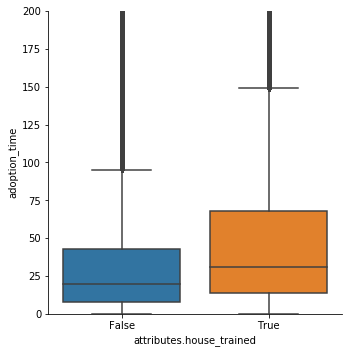

In [62]:
sizeplot3 = sns.catplot(x='attributes.house_trained', y='adoption_time', data=total, kind='box');
sizeplot3.set(ylim=(0,200))

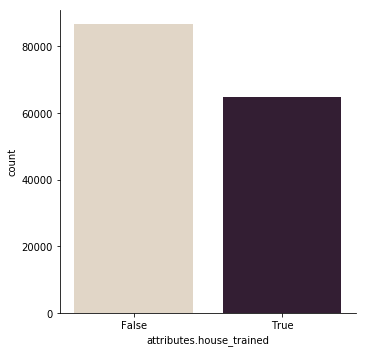

In [63]:
sns.catplot(x="attributes.house_trained", kind="count", palette="ch:.25", data=total);

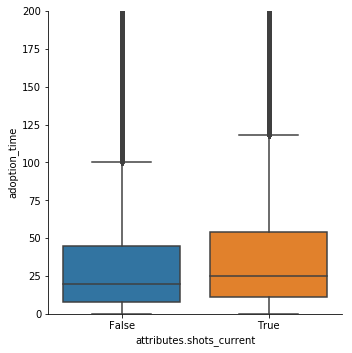

In [65]:
sizeplot3 = sns.catplot(x='attributes.shots_current', y='adoption_time', data=total, kind='box');
sizeplot3.set(ylim=(0,200))

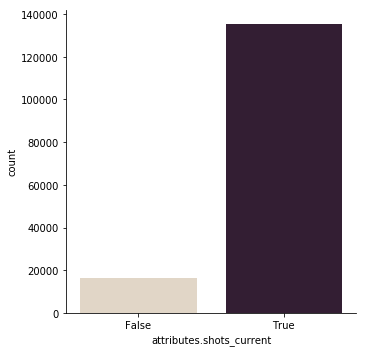

In [66]:
sns.catplot(x="attributes.shots_current", kind="count", palette="ch:.25", data=total);

In [67]:
from sklearn.model_selection import train_test_split
#trainval_X, test_X, trainval_y, test_y = train_test_split(X, y, test_size=0.2)
#use log_adpt_time as feature
trainval_X, test_X, trainval_y, test_y = train_test_split(X, total['log_adpt_time'], test_size=0.2)
print('Training set size = {} and Test set size = {}'.format(len(trainval_X),len(test_X)))

Training set size = 121187 and Test set size = 30297


In [69]:
X.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.shots_current,contact.address.state
0,Baby,Female,Small,True,True,True,True,CA
1,Young,Male,Small,False,True,True,True,CA
2,Young,Male,Medium,False,True,False,True,CA
3,Adult,Female,Medium,False,True,False,True,CA
4,Young,Male,Medium,True,True,False,True,CA


In [70]:
total_test = pd.concat([test_X,test_y], axis=1)

In [71]:
export = total_test.to_csv('./data/test_set_scoped_A1.csv', header=True, index = False)

In [72]:
total_trainval = pd.concat([trainval_X,trainval_y], axis=1)

In [73]:
export = total_trainval.to_csv('./data/trainval_set_scoped_A1.csv', header=True, index = False)

In [147]:
#from scipy import stats

In [169]:
#bc_adpt_time,lmbda = stats.boxcox((total['adoption_time']+1))

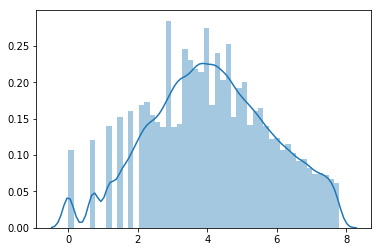

In [170]:
#sns.distplot(bc_adpt_time)

In [171]:
#lmbda

0.13720434611179522

In [172]:
#from scipy.special import boxcox,inv_boxcox

[Text(0, 0.5, 'count'), Text(0.5, 0, 'transformed time')]

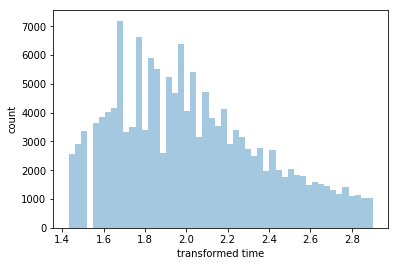

In [93]:
tf_adpt_time = total.apply(lambda x: np.power(((x['adoption_time'])+6),(0.2)), axis=1)
ax = sns.distplot(tf_adpt_time, kde=False)
ax.set(xlabel='transformed time', ylabel='count')

In [86]:
total.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,adoption_time
0,Baby,Female,Small,True,True,True,False,True,CA,19
1,Young,Male,Small,False,True,True,False,True,CA,29
2,Young,Male,Medium,False,True,False,False,True,CA,18
3,Adult,Female,Medium,False,True,False,False,True,CA,57
4,Young,Male,Medium,True,True,False,False,True,CA,8


In [87]:
len(X)

153436

In [88]:
total['mod_adpt_time'] = total.apply(lambda x: np.power(((x['adoption_time'])+6),(0.2)), axis=1)

In [89]:
from sklearn.model_selection import train_test_split
#trainval_X, test_X, trainval_y, test_y = train_test_split(X, y, test_size=0.2)
#use log_adpt_time as feature
trainval_X, test_X, trainval_y, test_y = train_test_split(X, total['mod_adpt_time'], test_size=0.2)
print('Training set size = {} and Test set size = {}'.format(len(trainval_X),len(test_X)))

Training set size = 122748 and Test set size = 30688


In [90]:
total_test = pd.concat([test_X,test_y], axis=1)
export = total_test.to_csv('./data/test_set_scoped_A2.csv', header=True, index = False)
total_trainval = pd.concat([trainval_X,trainval_y], axis=1)
export = total_trainval.to_csv('./data/trainval_set_scoped_A2.csv', header=True, index = False)